1. 입력 자료 joydata.txt를 읽어온다.

2. np.random.seed(1) 선언 후에 데이터를 셔플링한 후, train과 test를 7:3의 비율로 나눈다.

3. 특성 벡터 train와 test 자료 배열에 x0 = 1을 추가한다.

4. 학습을 진행하여 가중치 w를 구한다.

5. Train과 test 자료에 대하여 각각 예측과 평가를 진행한다.

1. 입력 자료 joydata.txt를 읽어온다.

In [38]:
import numpy as np
data = np.genfromtxt('data/joydata.txt')


2. np.random.seed(1) 선언 후에 데이터를 셔플링한 후, train과 test를 7:3의 비율로 나눈다.


In [39]:
np.random.seed(1)
np.random.shuffle(data)
x, y = data[:, :2], data[:, 2]
y = y.astype(int)

num = int(x.shape[0] * 0.7) ##percentage
x_train, x_test = x[:num], x[num:]
y_train, y_test = y[:num], y[num:]

3. 특성 벡터 train와 test 자료 배열에 x0 = 1을 추가한다.

In [40]:
X_train = np.c_[ np.ones(len(x_train)), x_train ]
X_test  = np.c_[ np.ones(len(x_test)), x_test ]
print(X_train[:5])

[[ 1.   -2.64 -2.2 ]
 [ 1.   -2.97 -1.53]
 [ 1.    1.    0.46]
 [ 1.   -2.84 -3.22]
 [ 1.   -0.05 -1.95]]


4. 학습을 진행하여 가중치 w를 구한다.

In [41]:
def perceptron_train(X, y, X0=False, eta=0.1, epochs=1, random_seed=1):
    """  Perceptron training function for binary class labels
    Input Parameters
        X : numpy.ndarray, shape=(n_samples, m_features), by default X0=False
            A 2D NumPy array containing the training examples
            or 
            If X0=True, X's shape=(n_samples, m_features+1) 
            It includes the bias or x0 = 1 for all samples 
        
        y : numpy.ndarray, shape=(n_samples,)
            A 1D NumPy array containing the true class labels
        
        X0: If True, then X must have X_0 = 1 in all samples.
             Set it Faslse, if X does not have X_0 
        
        eta : float (default: 0.1) 
            A learning rate for the parameter updates. Note that a learning
            rate has no effect on the direction of the decision boundary
            if the model weights are initialized to all zeros.
        
        epochs : int (default: 1), Number of passes over the training dataset.
        
        random_seed : int or None (default: 1)
            Seed for the pseudo-random number generator that initializes the
            weights w if w is None.
    
    Returns 
        w : numpy.ndarray, shape=(m_features, )
    
        If you wants W : numpy.ndarray, shape=(epochs, m_features) to use 
        when calling , then invoke this function with epochs = 1 multiple times 
        and save the result in the form of W = np.vstack([W, w]). 
        You may initialize the W = np.array([w]), where w is an initial weights.
    """
    if X0 == False:
        X = np.c_[ np.ones(len(X)), X ]
    
    randnum = np.random.RandomState(random_seed) 
    w = randnum.normal(loc=0.0, scale=0.01, size=X.shape[1])
           
    maxlabel, minlabel = y.max(), y.min()                 # for use of bipolar or unit step function
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            z = np.dot(xi, w)                             # Compute net input, same as np.dot(w.T, x)
            yhat = np.where(z > 0.0, maxlabel, minlabel)  # Apply unit step func and get output
            #print('xi{}, \t (yi,yhat)=({},{})'.format(np.round(xi,2), yi, yhat))
            if yi != yhat:
                delta = eta * (yi - yhat) * xi                # Compute delta    
                w += delta                                    # Adjust weight
                #print('xi{}, \t (yi,yhat)=({},{}), delta{}, w{}'.format
                #         (np.round(xi,2), yi, yhat, np.round(delta,2), np.round(w,2)))
        
    return w

1. w = perceptron_train(X_train, y_train, X0=True, eta=0.02, epochs=2, random_seed=5) \
w =  [-0.01558773  0.0174913   0.00890771] \
Misclassified:1/70
2. w = perceptron_train(X_train, y_train, X0=True, eta=0.03, epochs=2, random_seed=8) \
w =  [-0.02908795  0.04331283  0.0174303 ] \
Misclassified:1/70
3. w = perceptron_train(X_train, y_train, X0=True, eta=0.04, epochs=2, random_seed=10) \
w =  [-0.02668413  0.02955279  0.056546  ] \
Misclassified:1/70
4. w = perceptron_train(X_train, y_train, X0=True, eta=0.05, epochs=2, random_seed=10) \
w =  [-0.03668413  0.03515279  0.074546  ] \
Misclassified:2/70 \
이 설정에서 에포크 수가 매우 낮고 학습률이 높아, 모델이 충분한 학습을 할 시간이 주어지지 않을 것이며, 높은 학습률은 발산의 가능성을 높일 수 있습니다. 그리고 같은 초기값(random_seed)을 사용하여 학습하는 경우, 모델이 다른 초기값으로 학습할 때보다 안정성이 낮을 가능성이 있습니다. 이에 따라 학습 정확도가 낮을 확률이 가장 높을 것으로 예상됩니다.

In [42]:
print(X_train[:5])
print(y_train[:5])
w = perceptron_train(X_train, y_train, X0=True, eta=0.05, epochs=2, random_seed=10)
print('w = ', w)

[[ 1.   -2.64 -2.2 ]
 [ 1.   -2.97 -1.53]
 [ 1.    1.    0.46]
 [ 1.   -2.84 -3.22]
 [ 1.   -0.05 -1.95]]
[0 0 1 0 0]
w =  [-0.03668413  0.03515279  0.074546  ]


In [43]:
def perceptron_predict(X, w):
    z = np.dot(X, w)
    yhat = np.where(z > 0., 1, 0)
    return yhat

# train

In [44]:
#version 0.1
print('w = ', w)
yhat = perceptron_predict(X_train, w) 
missed = 0 # misclassified count
m_samples = len(y_train)
for m in range(m_samples):
    if yhat[m] != y_train[m]:
        missed += 1
print('Misclassified:{}/{}'.format(missed, m_samples))

w =  [-0.03668413  0.03515279  0.074546  ]
Misclassified:2/70


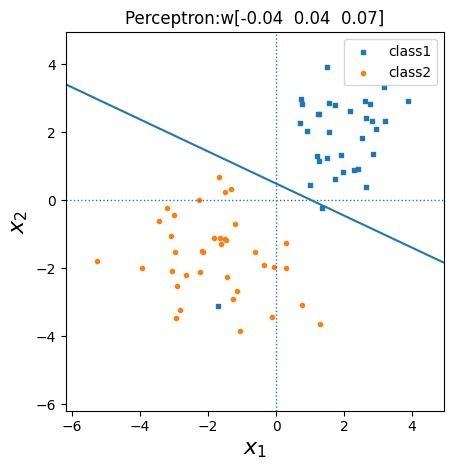

In [45]:
%run code/plot_xyw.py
plot_xyw(X_train, y_train, w.flatten(), X0=True)

# test

In [46]:
#version 0.1
yhat = perceptron_predict(X_test, w) 
missed = 0 # misclassified count
m_samples = len(y_test)
for m in range(m_samples):
    if yhat[m] != y_test[m]:
        missed += 1
print('Misclassified:{}/{}'.format(missed, m_samples))

Misclassified:0/30


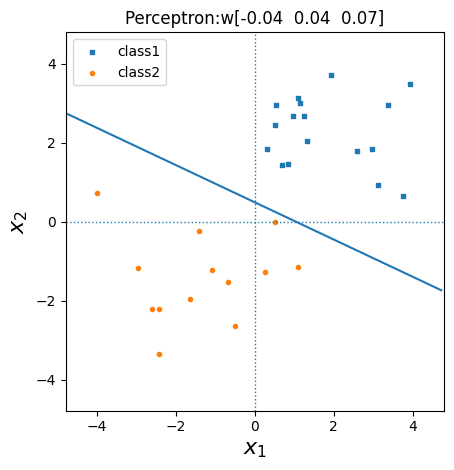

In [47]:
plot_xyw(X_test, y_test, w.flatten(), X0=True)